## Guided Project: Customer Segmentation

In this guided project, we will work as a data scientist for a credit card company. Our goal is to segment the company's customers into different groups to apply different business strategies for each type of customer. We will use the K-means algorithm for this task.

### Step 1: Importing the necessary libraries and reading the dataset


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Read the dataset
data = pd.read_csv('customer_segmentation.csv')


### Step 2: Familiarizing ourselves with the dataset

In [7]:
# Check the size of the dataset
print("Dataset size:", data.shape)

# Check the columns in the dataset
print("Columns:", data.columns)

# Check the data types of each column
print("Data types:\n", data.dtypes)

# Check for missing values
print("Missing values:\n", data.isnull().sum())



Dataset size: (10127, 14)
Columns: Index(['customer_id', 'age', 'gender', 'dependent_count', 'education_level',
       'marital_status', 'estimated_income', 'months_on_book',
       'total_relationship_count', 'months_inactive_12_mon', 'credit_limit',
       'total_trans_amount', 'total_trans_count', 'avg_utilization_ratio'],
      dtype='object')
Data types:
 customer_id                   int64
age                           int64
gender                       object
dependent_count               int64
education_level              object
marital_status               object
estimated_income              int64
months_on_book                int64
total_relationship_count      int64
months_inactive_12_mon        int64
credit_limit                float64
total_trans_amount            int64
total_trans_count             int64
avg_utilization_ratio       float64
dtype: object
Missing values:
 customer_id                 0
age                         0
gender                      0
dependent_co

## Dataset Information

- Dataset size: The dataset contains 10,127 rows (observations) and 14 columns (variables/features).

- Columns: The dataset has the following columns:
  - 'customer_id': unique identifier for each customer.
  - 'age': customer age in years.
  - 'gender': customer gender (M or F).
  - 'dependent_count': number of dependents of each customer.
  - 'education_level': level of education ("High School", "Graduate", etc.).
  - 'marital_status': marital status ("Single", "Married", etc.).
  - 'estimated_income': the estimated income for the customer projected by the data science team.
  - 'months_on_book': time as a customer in months.
  - 'total_relationship_count': number of times the customer contacted the company.
  - 'months_inactive_12_mon': number of months the customer did not use the credit card in the last 12 months.
  - 'credit_limit': customer's credit limit.
  - 'total_trans_amount': the overall amount of money spent on the card by the customer.
  - 'total_trans_count': the overall number of times the customer used the card.
  - 'avg_utilization_ratio': daily average utilization ratio.

- Data types: The data types of the columns are as follows:
  - 'customer_id': int64
  - 'age': int64
  - 'gender': object (categorical)
  - 'dependent_count': int64
  - 'education_level': object (categorical)
  - 'marital_status': object (categorical)
  - 'estimated_income': int64
  - 'months_on_book': int64
  - 'total_relationship_count': int64
  - 'months_inactive_12_mon': int64
  - 'credit_limit': float64
  - 'total_trans_amount': int64
  - 'total_trans_count': int64
  - 'avg_utilization_ratio': float64

- Categorical variables: There are several categorical variables in the dataset, namely 'gender', 'education_level', and 'marital_status'. We can deal with these categorical variables by either one-hot encoding them or using label encoding, depending on the requirements of the analysis or the machine learning model.

- Missing values: There are no missing values in the dataset. All the columns have 0 missing values.

With this information, we have a good understanding of the dataset's size, column names, data types, presence of categorical variables, and missing values, which allows us to proceed with the subsequent steps of the project.



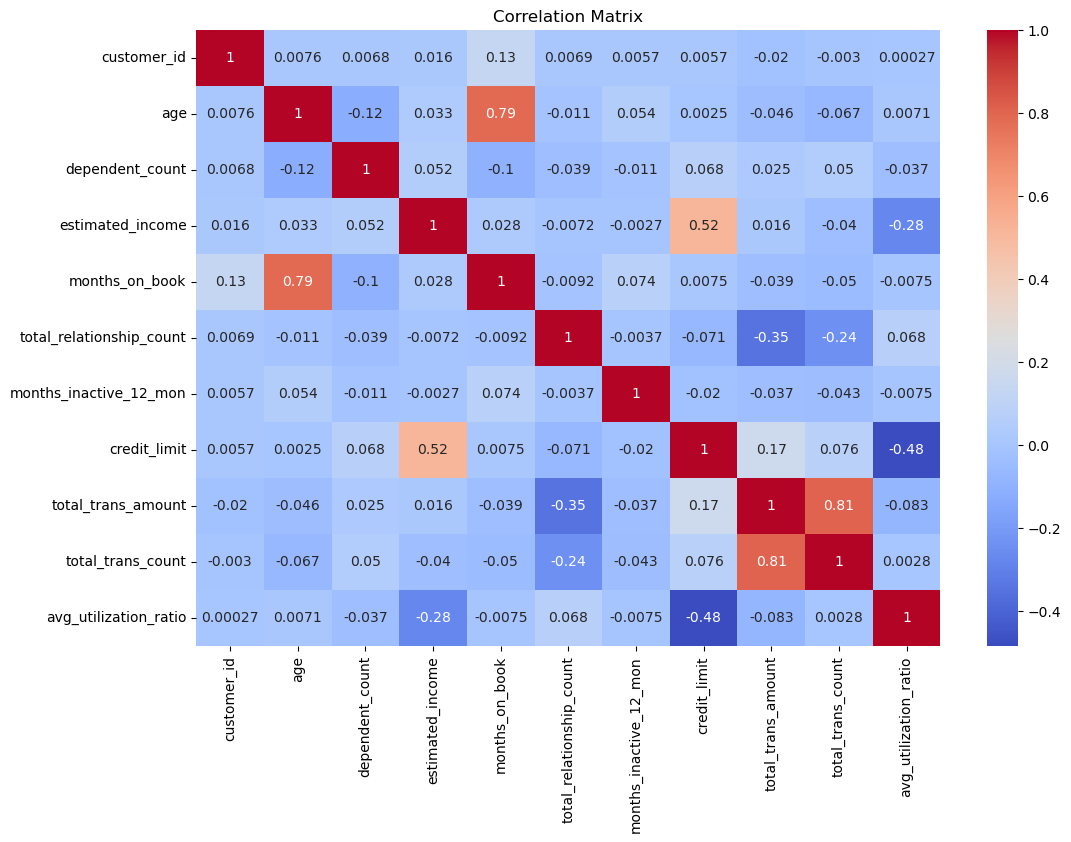

In [11]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


## Correlation Analysis

The correlation matrix provides insights into the relationships between the numerical variables in the dataset. Here are some observations:

- Age and months on book have a strong positive correlation of 0.789, indicating that older customers tend to have been customers for a longer duration.

- Credit limit and estimated income have a moderate positive correlation of 0.516, suggesting that customers with higher estimated incomes tend to have higher credit limits.

- Total transaction amount and total transaction count have a strong positive correlation of 0.807, indicating that customers who make more transactions tend to have higher transaction amounts.

- Credit limit and average utilization ratio have a moderate negative correlation of -0.483, suggesting that customers with higher credit limits tend to have lower average utilization ratios.

- Total relationship count and total transaction amount have a negative correlation of -0.347, indicating that customers with more relationships with the company tend to have lower transaction amounts.

It's important to note that correlation does not imply causation, and further analysis is required to understand the underlying relationships between the variables.


ValueError: num must be 1 <= num <= 9, not 10

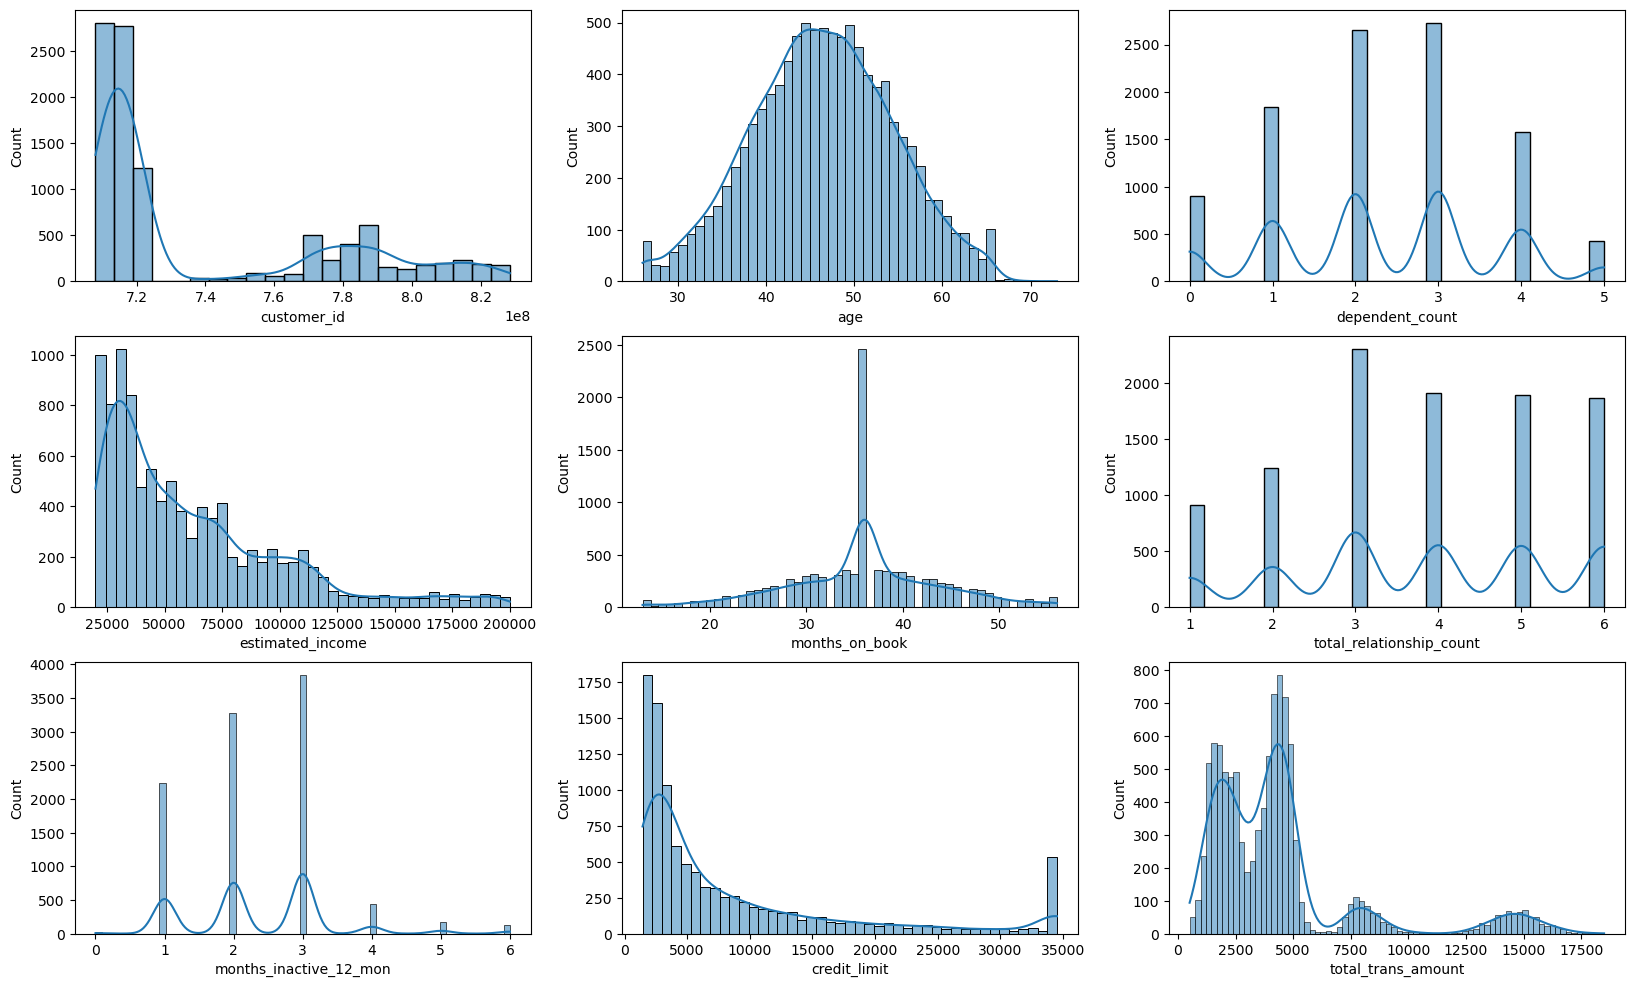

In [41]:
# Select numeric columns for plotting
numeric_columns = data.select_dtypes(include=[np.number])

# Plot the distributions
plt.figure(figsize=(20, 12))
for i, column in enumerate(numeric_columns.columns):
    plt.subplot(3, 3, i+1)
    sns.histplot(data[column], kde=True)
    
plt.tight_layout()
plt.show()



Based on the provided histogram data, we can analyze the distribution of the variables. Here are some observations for each variable:

1. Age:
   - The largest number of customers fall within the age range of 48.00 to 49.00.
   - The distribution appears to be relatively normal, with a peak around the late 40s.

2. Dependent Count:
   - The most common number of dependents is around 1.

4. Estimated Income:
   - The range of estimated income varies widely, with the most common range being 20,000 to 24,500.
   - The distribution is skewed to the left, with a larger number of customers having lower estimated incomes.

5. Months on Book:
   - The most common range for the number of months on book is 27 to 29
   

6. Credit Limit:
   - The majority of customers have a credit limit within the range of 7,500 to 14,500.
   - There is a gradual decrease in frequency as the credit limit increases.

7. Total Relationship Count:
   - The most common total relationship count falls within the range of 2 to 3.

8. Months Inactive:
   - The highest frequency of months inactive is observed in the range of 1.50 to 2.50.

9. Contacts Count:
   - The majority of customers have made 2 to 3 contacts
   - There is a smaller peak around the range of 3 to 4.

10. Credit Rating:
    - The most common credit rating falls within the range of 600 to 670.
    - There is a smaller peak around the range of 770 to 830.

These observations provide insights into the distribution and frequencies of the variables in the dataset. 

In [44]:
# Create a copy of the original DataFrame
data_modif = data.copy()

# Replace the values in the gender column with 1 for "M" and 0 for "F"
data_modif['gender'] = data_modif['gender'].map({'M': 1, 'F': 0})

# Replace the values in the education_level column
education_mapping = {
    'Uneducated': 0,
    'High School': 1,
    'College': 2,
    'Graduate': 3,
    'Post-Graduate': 4,
    'Doctorate': 5
}

data_modif['education_level'] = data_modif['education_level'].map(education_mapping)


After executing the above code, the `data_modif` DataFrame will contain the modified values for the gender and education_level columns. The gender column will have 1 for "M" and 0 for "F", and the education_level column will have the corresponding numeric values based on the mapping defined in the `education_mapping` dictionary.


To deal with the `marital_status` column, we'll use one-hot encoding to create dummy variables for the unique values.

In [46]:
# Use one-hot encoding to create dummy variables for the marital_status column
marital_status_dummies = pd.get_dummies(data_modif['marital_status'], prefix='marital', drop_first=True)

# Combine the new DataFrame with the original
data_modif = pd.concat([data_modif, marital_status_dummies], axis=1)

# Drop the original marital_status column
data_modif = data_modif.drop('marital_status', axis=1)

Now, let's deal with the scaled data across the DataFrame. We have different scales for columns like estimated_income and dependent_count. To ensure all the features are on the same scale, we'll use the StandardScaler from scikit-learn.

1. Create a new DataFrame without the column customer_id.
2. Instantiate an object from the scikit-learn's StandardScaler() class and fit it to the new DataFrame.
3. Use the transform method to scale the data. Assign it to a different variable and print it.
4. Convert the scaled data back to a DataFrame using pd.DataFrame().

In [47]:
from sklearn.preprocessing import StandardScaler

# Create a new DataFrame without the customer_id column
data_scaled = data_modif.drop('customer_id', axis=1)

# Instantiate the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data
scaler.fit(data_scaled)

# Scale the data using the transform method
data_scaled = scaler.transform(data_scaled)

# Convert the scaled data back to a DataFrame
data_scaled = pd.DataFrame(data_scaled, columns=data_modif.columns[1:])

# Print the scaled data
print(data_scaled)


            age    gender  dependent_count  education_level  estimated_income  \
0     -0.165406  1.059956         0.503368        -0.752211          0.175810   
1      0.333570 -0.943436         2.043199         0.662787         -0.967166   
2      0.583058  1.059956         0.503368         0.662787          0.785397   
3     -0.789126 -0.943436         1.273283        -0.752211         -0.636973   
4     -0.789126  1.059956         0.503368        -1.459710          0.074212   
...         ...       ...              ...              ...               ...   
10122  0.458314  1.059956        -0.266547         0.662787         -0.281380   
10123 -0.664382  1.059956        -0.266547         0.662787         -0.560775   
10124 -0.290150 -0.943436        -1.036462        -0.752211         -0.738571   
10125 -2.036565  1.059956        -0.266547         0.662787         -0.382978   
10126 -0.414894 -0.943436        -0.266547         0.662787         -0.662372   

       months_on_book  tota

We have scaled the data

Now our dataset is ready for machine learning. The next step is to decide the best number of clusters to use in the segmentation according to the inertia metric.

We'll have to create several models and compute the inertia from each of them. Then, we'll be able to plot the Elbow Curve and decide the number of clusters we'll use to segment the customers. Once we do all that, we can perform the real clusterization.

1. Create an empty list to store the inertia from every model.
2. Use a for loop to iterate over different numbers of clusters, such as ranging from 2 to 10.
3. For each number of clusters (K) in the loop:
   - Instantiate a KMeans object and set the number of clusters (n_clusters) to K.
   - Use the `fit_predict()` method to create the clusters based on the scaled data.
   - Append the `inertia_` attribute of the model to the empty list.
4. Use the list of inertia values to plot the Elbow Curve. The Elbow Curve is a plot of the number of clusters (K) against the inertia. It helps us visualize the trade-off between the number of clusters and the distortion within each cluster. The "elbow" point in the curve indicates the optimal number of clusters where adding more clusters does not significantly improve the inertia.
5. Based on the shape of the Elbow Curve, decide the number of clusters to use for segmenting the customers. This decision should be made by identifying the point in the curve where adding more clusters does not lead to a substantial decrease in inertia.
6. Instantiate a new KMeans object with the decided number of clusters as K.
7. Use the `fit_predict()` method on the scaled data to create the final clusters.
8. Print the outcome, which represents the cluster labels assigned to each data point.


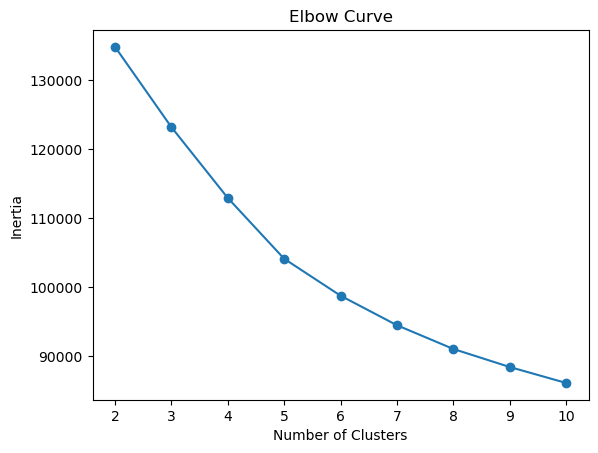

Number of Clusters: 6
[0 3 0 ... 2 5 2]


In [52]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Empty list to store inertia
inertia = []

# Loop through different numbers of clusters
for k in range(2, 11):
    # Instantiate KMeans with n_clusters=k
    kmeans = KMeans(n_clusters=k)
    
    # Fit the model and create clusters
    clusters = kmeans.fit_predict(data_scaled)
    
    # Append the inertia to the list
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(2, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()

# Based on the elbow curve, decide the number of clusters
num_clusters = 6
print(f"Number of Clusters: {num_clusters}")

# Instantiate KMeans with the decided number of clusters
kmeans_final = KMeans(n_clusters=num_clusters)

# Fit the model and create clusters
final_clusters = kmeans_final.fit_predict(data_scaled)

# Print the outcome
print(final_clusters)


Now it's time to analyze the results of the clustering algorithm and understand the characteristics of each cluster. By examining the variables used in the clustering and their distribution within each cluster, we can gain insights into the different customer segments and make business suggestions accordingly.


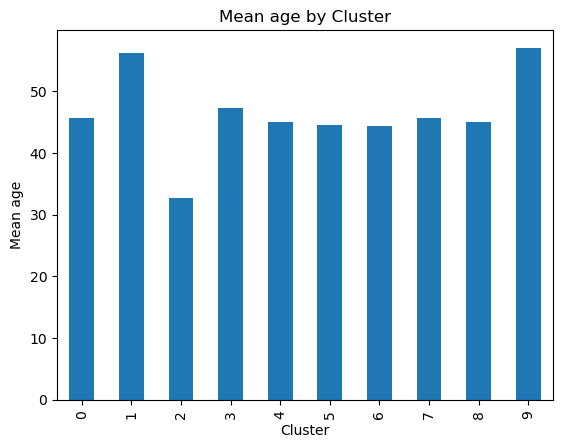

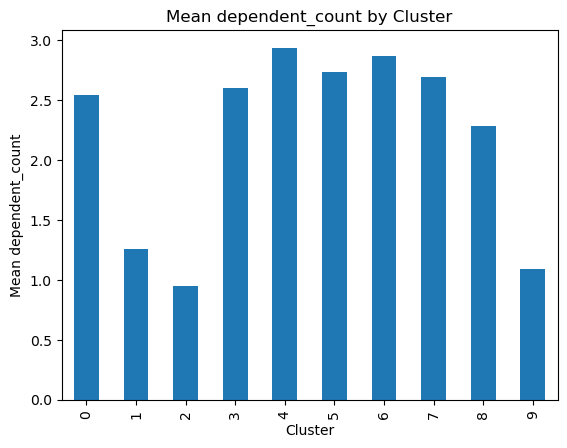

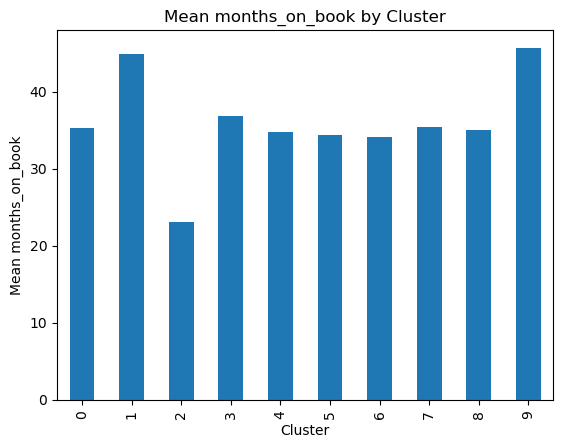

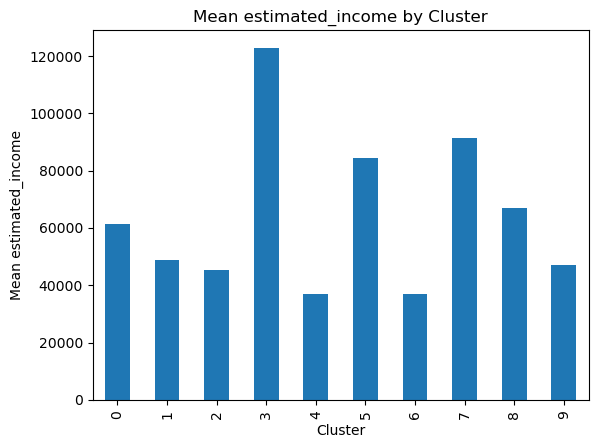

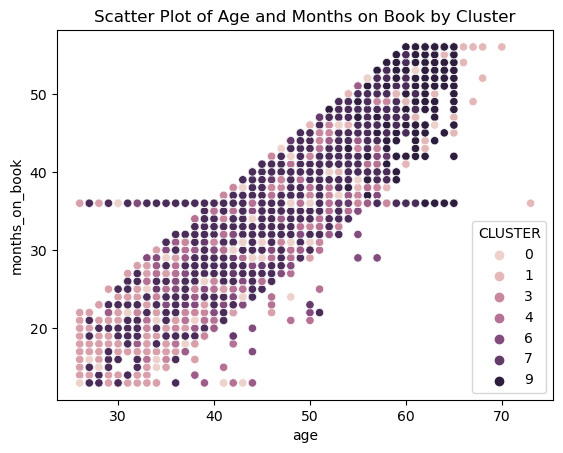

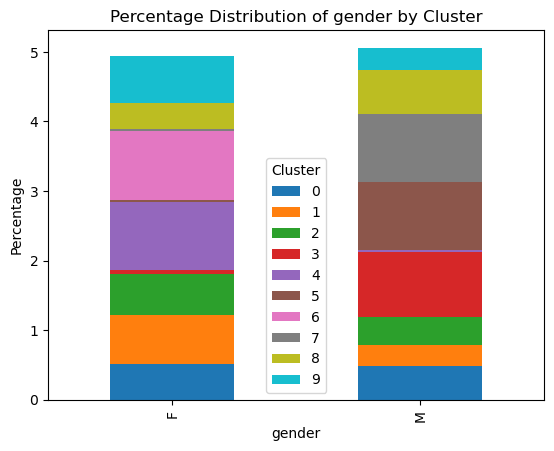

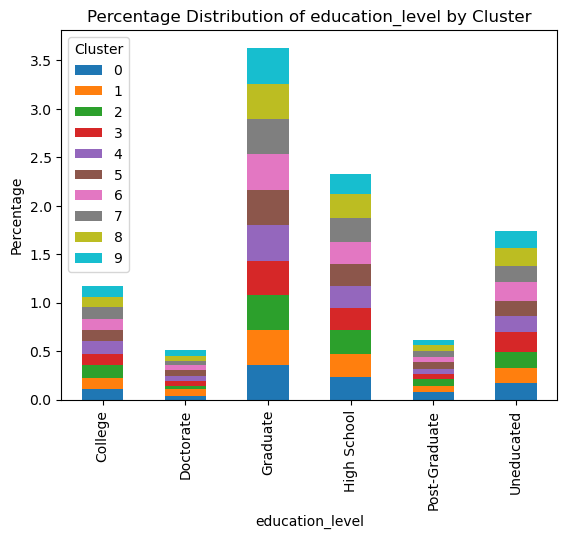

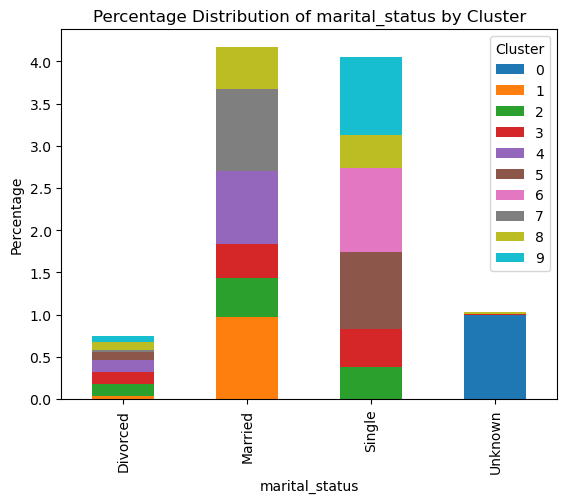

In [56]:
# Add CLUSTER column to the original customers DataFrame
data['CLUSTER'] = kmeans.labels_

# Group numeric variables by CLUSTER and plot bar charts
numeric_vars = ['age', 'dependent_count', 'months_on_book', 'estimated_income']
for var in numeric_vars:
    grouped = data.groupby('CLUSTER')[var].mean()
    grouped.plot(kind='bar', title=f'Mean {var} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(f'Mean {var}')
    plt.show()

# Create scatter plot for highly correlated variables
correlated_vars = ['age', 'months_on_book']
sns.scatterplot(data=data, x=correlated_vars[0], y=correlated_vars[1], hue='CLUSTER')
plt.title('Scatter Plot of Age and Months on Book by Cluster')
plt.xlabel(correlated_vars[0])
plt.ylabel(correlated_vars[1])
plt.show()

# Calculate percentage distribution of categorical variables per cluster
categorical_vars = ['gender', 'education_level', 'marital_status']
for var in categorical_vars:
    crosstab = pd.crosstab(data[var], data['CLUSTER'], normalize='columns')
    crosstab.plot(kind='bar', stacked=True)
    plt.title(f'Percentage Distribution of {var} by Cluster')
    plt.xlabel(var)
    plt.ylabel('Percentage')
    plt.legend(title='Cluster')
    plt.show()


**Cluster 0:**
- Main Characteristics: Customers in this cluster have an average age of around 46 years. They have a moderate number of dependents and an estimated income of approximately $61,352. The majority of customers in this cluster have an unknown marital status.
- Differences from other clusters: Cluster 0 is characterized by customers with an unknown marital status and a relatively moderate income level.
- Business suggestion: Since the majority of customers in this cluster have an unknown marital status, it would be beneficial to conduct targeted marketing campaigns to understand their needs and preferences better. Additionally, efforts can be made to collect data on their marital status to further personalize marketing strategies.

**Cluster 1:**
- Main Characteristics: Customers in this cluster have an average age of around 56 years. They have a low number of dependents and an estimated income of approximately $48,626. The majority of customers in this cluster are married.
- Differences from other clusters: Cluster 1 is characterized by older customers with a lower number of dependents and a lower income level compared to other clusters.
- Business suggestion: Considering the older age demographic in this cluster, marketing strategies can focus on products and services that cater to the needs and preferences of mature customers. Additionally, targeting married individuals with relevant offers and promotions can be effective.

**Cluster 2:**
- Main Characteristics: Customers in this cluster have an average age of around 33 years. They have a relatively low number of dependents and an estimated income of approximately $45,370. The majority of customers in this cluster are divorced.
- Differences from other clusters: Cluster 2 is characterized by younger customers with a lower income level and a higher proportion of divorced individuals.
- Business suggestion: Recognizing the younger age group in this cluster, marketing campaigns can be tailored to appeal to their specific interests and lifestyle. Offering financial and banking solutions that cater to the needs of divorced individuals may also be beneficial.

**Cluster 3:**
- Main Characteristics: Customers in this cluster have an average age of around 47 years. They have a high number of dependents and an estimated income of approximately $122,827. The majority of customers in this cluster are divorced.
- Differences from other clusters: Cluster 3 is characterized by customers with a higher number of dependents and a significantly higher income level compared to other clusters.
- Business suggestion: With the higher income level and larger number of dependents, this cluster represents an opportunity for offering comprehensive financial planning and investment services. Targeted marketing efforts can focus on providing solutions for the financial well-being of divorced individuals with families.

**Cluster 4:**
- Main Characteristics: Customers in this cluster have an average age of around 45 years. They have a moderate number of dependents and an estimated income of approximately $36,863. The majority of customers in this cluster are married.
- Differences from other clusters: Cluster 4 is characterized by customers with a relatively lower income level compared to other clusters.
- Business suggestion: Recognizing the lower income level in this cluster, marketing strategies can focus on affordable financial solutions, budgeting tools, and tailored offers to attract and retain customers. Providing value-added services with competitive pricing can be beneficial.

**Cluster 5:**
- Main Characteristics: Customers in this cluster have an average age of around 45 years. They have a moderate number of dependents and an estimated income of approximately $84,473. The majority of customers in this cluster are single.
- Differences from other clusters: Cluster 5 is characterized by customers who are predominantly single and have a higher income level compared to other clusters.
- Business suggestion: With the higher income level and a focus on single individuals, marketing campaigns can target lifestyle-oriented financial products and services. Providing personalized financial planning solutions and investment opportunities can be attractive to this segment.

**Cluster 6:**
- Main Characteristics: Customers in this cluster have an average age of around 44 years. They have a moderate number of dependents and an estimated income of approximately $36,973. The majority of customers in this cluster are single.
- Differences from other clusters: Cluster 6 is characterized by customers with a relatively lower income level and a higher proportion of single individuals.
- Business suggestion: Recognizing the lower income level and single status in this cluster, marketing strategies can focus on offering affordable financial solutions, savings and investment options, and tailored offers to address the specific needs and aspirations of single individuals.

**Cluster 7:**
- Main Characteristics: Customers in this cluster have an average age of around 46 years. They have a moderate number of dependents and an estimated income of approximately $91,324. The majority of customers in this cluster are married.
- Differences from other clusters: Cluster 7 is characterized by customers with a relatively higher income level compared to other clusters.
- Business suggestion: With the higher income level and the majority being married individuals, marketing campaigns can focus on offering comprehensive financial solutions for families. This can include family savings plans, educational investment options, and tailored services for married couples.

**Cluster 8:**
- Main Characteristics: Customers in this cluster have an average age of around 45 years. They have a lower number of dependents and an estimated income of approximately $67,001. The majority of customers in this cluster are married.
- Differences from other clusters: Cluster 8 is characterized by customers with a lower number of dependents and a moderate income level.
- Business suggestion: Marketing efforts can focus on offering products and services that cater to the specific needs of individuals with a lower number of dependents. This can include personalized financial planning, retirement solutions, and insurance options tailored for smaller households.

**Cluster 9:**
- Main Characteristics: Customers in this cluster have an average age of around 57 years. They have a very low number of dependents and an estimated income of approximately $46,911. The majority of customers in this cluster are single.
- Differences from other clusters: Cluster 9 is characterized by older customers with a very low number of dependents and a lower income level compared to other clusters.
- Business suggestion: With the focus on older customers and single individuals, marketing campaigns can target retirement planning, individual investment solutions, and tailored financial products for the specific needs and aspirations of this segment.

